In [2]:
import os
import json
import pandas as pd
import project_example as pe

In [3]:
def load_data(path):
    """
        Load events from files and convert to dataframe.
    """
    map_lst=[]
    for f in os.listdir(path):
        file_name=os.path.join(path,f)
        if os.path.isfile(file_name):
            for line in open(file_name):
                obj = json.loads(line.strip())
                if not obj is None:
                    map_lst.append(obj)
    return pd.DataFrame(map_lst) 

In [4]:
df = load_data("active1000")

In [5]:
df = df.loc[df["url"] != "http://adressa.no"]
df.head()

,eventId,category,activeTime,title,url,userId,publishtime,time,documentId
2,483221791,None,NaN,None,http://adressa.no/nyheter/trondheim/2016/12/31...,cx:iimz2wwcwxu7d721:2r8odp9zhg5yp,None,1483225328,None
4,1908339310,None,NaN,None,http://adressa.no/pluss/kultur/2016/12/31/bare...,cx:iimz2wwcwxu7d721:2r8odp9zhg5yp,None,1483225387,None
15,828764961,None,NaN,Se lesernes nyttårsbilder,http://adressa.no/nyheter/2016/12/31/se-lesern...,cx:il0sdznsjgg9uxgy:3bi2ksost85yi,2016-12-31T17:13:57.000Z,1483225500,9f3999bd1a1a8d67bcb073ad54840f15cb30f014
16,2066591949,None,51.0,None,http://adressa.no/nyheter/trondheim/2016/12/31...,cx:ihnzu06beuazgkud:dj2r4rm22hul,None,1483225501,None
17,378480578,None,7.0,Se lesernes nyttårsbilder,http://adressa.no/nyheter/2016/12/31/se-lesern...,cx:ijtjdxpz93t5f8m5:2iz9n4nuh22ky,2016-12-31T17:13:57.000Z,1483225504,9f3999bd1a1a8d67bcb073ad54840f15cb30f014


In [6]:
df["category"].value_counts()

nyheter|trondheim       111330
100sport|vintersport     78336
pluss|nyheter            66384
nyheter|sortrondelag     59679
100sport|fotball         45221
                         ...  
sport|friidrett              1
kultur|uteliv                1
tema|kvinner                 1
sport|langrenn               1
kultur|aretstronder          1
Name: category, Length: 78, dtype: int64

In [7]:
df["userId"].value_counts()

cx:ib1vo01vq38f2mqc:20lut6o1pv35i              11606
cx:1m0dupfv97gglk5u9yfw65lhl:2sjgjqpk418jv      4888
cx:ijq24khh55o2122b:289q18ivmeykj               4818
cx:25keeu1fyal75150chjpjhsgbb:1hkvdvyhju9nl     4512
cx:indkf9qa1j5duj67:2ugo0yr43zmrh               3695
                                               ...  
cx:2pjx63m63citmksxzlm8ybh1e:9tbt0753ou2s        416
cx:13107309109141761847803:1e1rswsawyyc3         398
cx:2sf5o8rm80qqm2qlpgbi8qe2ro:1l7kv1n1ca9j6      385
cx:imhu7vxoj7z10pry:rlyyspfc7igg                 381
cx:3issdo0lv8bl5t4f8ghwjqfi7:1x1mapsk4o78i       298
Name: userId, Length: 1000, dtype: int64

In [13]:
df["activeTime"].value_counts()
import project_example as pe
pe.load_dataset(df)

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 1.],
       [1., 0., 1., ..., 0., 0., 0.]])


Recommendation based on MF...
Iteration: 1
Train mse: 0.6028010179282268
Test mse: 0.6913873701446002
Iteration: 2
Train mse: 0.5352541484174914
Test mse: 0.6445373262571954
Iteration: 5
Train mse: 0.5132553099392438
Test mse: 0.6291036494584553
Iteration: 10
Train mse: 0.5101022803063364
Test mse: 0.6259236008209573
Iteration: 25
Current iteration: 10
Train mse: 0.5092217609709648
Test mse: 0.6247774865420848
Iteration: 50
Current iteration: 10
Current iteration: 20
Train mse: 0.5090008807365515
Test mse: 0.6244602531065939
Iteration: 100
Current iteration: 10
Current iteration: 20
Current iteration: 30
Current iteration: 40
Current iteration: 50
Train mse: 0.5089493015081172
Test mse: 0.6243641707550818


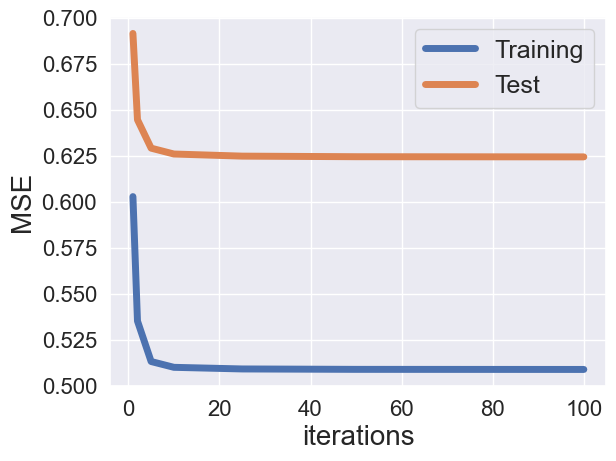

In [10]:
import project_example as pe
pe.load_dataset(df)

print("\nRecommendation based on MF...")
pe.collaborative_filtering(df)